In [77]:
import tensorflow as tf
import numpy as np
na = np.newaxis

import matplotlib.pyplot as plt

# 1. Inputs:
Domain $X = \mathbb{R}^R$ ($R$-Dimensional)
$T \subset X$


### Fixed:

#### General:
- R
- Tlims: (Rx2)
- Data D: (NxR) (all points in T)

#### Inducing points:
    -> fix nbr M 
    -> Z: (MxR) location
    -> u: (M) (each sample of function values at the inducing points is M dimensional) 

#### Hyperparameters ($\Theta$)
    -> fixed at first, might become be optimized later as well
$\Theta = (\gamma, \alpha_1,...,  \alpha_R, \overline{u})$


### Parameters:
variational dist at inducing points u: q(u) = N (u;m,S)

m: (M)

S: (MxM)

In [4]:
# pseudo stuff, no working code!!!

# constants:
# - R, T, M
# - D (NxR)
# - Z (MxR)
# - Theta values (gamma, alphas, ustrich)

# placeholders:
# - m (M)
# - S (MxM)


# kernel stuff:

def kernel_function(X, Y):
    return K_XY

# kernels to compute: K_zz, K_zd, trace(K_dd)

def lower_bound(D, m, S, Theta, T):
    K_zz = ...
    K_zz_inv = ...
    
    return - region_integral(m, S, K_zz_inv, Z, Theta, T) + datapoint_expectations(D, m, S, K_zz_inv, Theta) - kl_term(m,S,K_zz, K_zz_inv, Theta) 

def kl_term(m, S, K_zz, K_zz_inv, Theta):
    return scalar_value_node

def datapoint_expectations(D, m, S, K_zz_inv, Theta):
    
    k_zd = ...
    k_dd = ...
    
    musqare_N = ...
    sigsquare_N = ...
    
    C = 0.57721... #Euler-Masceroni constant
    
    lookup values = ... # problem: how to implement lookup table
    
    return scalar_value_node

def region_integral(m, S, K_zz_inv, Z, Theta, T):
    Psi = ... (MxM) 
    return scalar_value_node

# Tensorflow Test

In [129]:
# inducing point locations
Z = np.linspace(0, 10, 11)[:,na]
print(Z.shape)

(11, 1)


In [160]:
def ard_kernel(X1, X2, gamma=1., alphas=None):
    # X1:  (n1 x d)
    # X2:  (n2 x d)
    # out: (n1 x n2
    
    with tf.name_scope('ard_kernel'):
        if alphas is None:
            alphas = tf.ones([tf.shape(X1)[1]])
        return gamma * tf.reduce_prod(tf.exp(- (tf.expand_dims(X1, 1) - tf.expand_dims(X2, 0))**2 / (2 * tf.expand_dims(tf.expand_dims(alphas, 0), 0))), axis=2) 

def kl_term(m, S, K_zz, K_zz_inv, u_ovln):
    mean_diff = (u_ovln * tf.ones([tf.shape(Z_ph)[0]]) - m)
    first  = tf.trace(tf.matmul(K_zz_inv, S))
    second = tf.log(tf.norm(K_zz) / tf.norm(S))
    third  = tf.to_float(tf.shape(m)[0])
    fourth = tf.reduce_sum(tf.multiply(tf.reduce_sum(tf.multiply(mean_diff, tf.transpose(K_zz_inv)), axis=1) , mean_diff))
    return 0.5 * (first  - second - third + fourth)

In [172]:
tf.reset_default_graph()

Z_ph = tf.placeholder(tf.float32, [None, None], name='inducing_point_locations')
u_ph = tf.placeholder(tf.float32, [],           name='inducin_point_mean')
n_ph = tf.placeholder(tf.int32,   [],           name='number_samples')


num_inducing_points = 11# tf.shape(Z_ph)[0] TODO: was da tun?

m_init = tf.zeros([num_inducing_points])
m = tf.Variable(m_init)
S_init = tf.eye(num_inducing_points)
S = tf.Variable(S_init, validate_shape=False)

K_zz  = ard_kernel(Z_ph, Z_ph)
K_zz_inv = tf.matrix_inverse(K_zz)

with tf.name_scope('approximation'):
    kl_term_op = kl_term(m, S, K_zz, K_zz_inv, u_ph)
    tf.summary.scalar('kl_div', kl_term_op)
    
with tf.name_scope('optimization'):
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(kl_term_op)

with tf.name_scope('prior_sampling'):
    cov  = K_zz
    mean = u_ph * tf.ones([num_inducing_points])
    ind_point_dist = tf.contrib.distributions.MultivariateNormalFullCovariance(mean, cov)
    samples = ind_point_dist.sample(n_ph)
    
merged = tf.summary.merge_all()

In [173]:
max_iterations = 100

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('logs', sess.graph)
    
    for i in range(max_iterations):
        _, summary, kl = sess.run([train_step, merged, kl_term_op], feed_dict={Z_ph:Z, u_ph:0.})
        writer.add_summary(summary, i)
        print(kl)

17.7462
-56.4085
-129.336
-202.659
-276.146
-349.717
-423.339
-496.995
-570.675
-644.373
-718.086
-791.809
-865.542
-939.282
-1013.03
-1086.78
-1160.54
-1234.3
-1308.07
-1381.83
-1455.61
-1529.38
-1603.16
-1676.93
-1750.72
-1824.5
-1898.28
-1972.07
-2045.85
-2119.64
-2193.43
-2267.22
-2341.02
-2414.81
-2488.6
-2562.4
-2636.19
-2709.99
-2783.79
-2857.58
-2931.38
-3005.18
-3078.98
-3152.78
-3226.58
-3300.38
-3374.19
-3447.99
-3521.79
-3595.59
-3669.4
-3743.2
-3817.01
-3890.81
-3964.62
-4038.42
-4112.23
-4186.04
-4259.84
-4333.65
-4407.46
-4481.26
-4555.07
-4628.88
-4702.69
-4776.5
-4850.31
-4924.12
-4997.92
-5071.73
-5145.54
-5219.35
-5293.16
-5366.97
-5440.79
-5514.6
-5588.41
-5662.22
-5736.03
-5809.84
-5883.65
-5957.46
-6031.27
-6105.09
-6178.9
-6252.71
-6326.52
-6400.34
-6474.15
-6547.96
-6621.78
-6695.59
-6769.4
-6843.22
-6917.03
-6990.84
-7064.66
-7138.47
-7212.28
-7286.1


### example sampling:

In [164]:
# sampling
num_samples = 10

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('logs', sess.graph)
    sample_res, mean_res, cov_res = sess.run([samples, mean, cov], feed_dict={Z_ph:Z, u_ph:0., n_ph:num_samples})

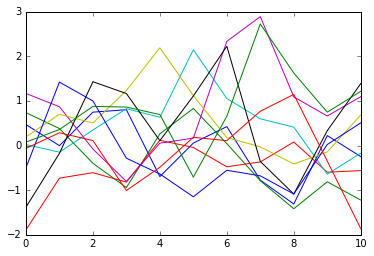

In [100]:
for i in range(num_samples):
    plt.plot(Z, sample_res[i])
plt.show()